<img src='../images/gdd-logo.png' width='300px' align='right' style="padding: 15px">

# Pandas

Let's start exploring datasets. For this we are going to use the `pandas` library.

In this section we will cover:

- [Importing the library](#import)
- [Exploratory analysis](#exploratory)
- [Data Cleaning](#cleaning)
- [Plotting with `matplotlib`](#plotting)

<a id='import'></a>

## Importing

Pandas is a sepcialised package that allows us to work with databases using python.

First we need to import the package.

In [1]:
import pandas as pd

<a id='exploratory'></a>

## Exploratory analysis

The dataset  we'll be using was downloaded as a CSV from [this Google Trends query](https://trends.google.com/trends/explore?date=2004-01-01%202020-12-31&q=%2Fm%2F05z1_,%2Fm%2F075st,%2Fm%2F0212jm,%2Fm%2F02p97,%2Fm%2F080_2).

<img src='../images/what-i-think-i-do.png' width='600px' align='left'>

filepath: `data/programming-languages.csv`

This is a time series indexed by month with the search interest for each browser.

- **Month:** Each month from 2004-01 to 2020-12
- **Python:** Search interest for 
- **SQL:** Search interest for Python
- **R:** Search interest for R
- **JavaScript:** Search interest for JavaScript
- **Visual Basic for Applications:** Search interest for VBA

Google defines the values of search interest as:

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Best of luck and may the best browser win!

In [2]:
# Create data to use:

trends = pd.read_csv('../data/programming-trends.csv')

In [3]:
trends.head()

,Month,Python,SQL,R,JavaScript,Visual Basic for Applications
0,2004-01-01,14,84,6,88,14
1,2004-02-01,14,94,6,95,16
2,2004-03-01,15,93,<5,89,15
3,2004-04-01,14,96,7,90,15
4,2004-05-01,12,91,6,87,14


In [4]:
trends.columns

Index(['Month', 'Python', 'SQL', 'R', 'JavaScript',
       'Visual Basic for Applications'],
      dtype='object')

In [5]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Month                          204 non-null    object
 1   Python                         204 non-null    int64 
 2   SQL                            204 non-null    int64 
 3   R                              204 non-null    object
 4   JavaScript                     204 non-null    int64 
 5   Visual Basic for Applications  204 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.7+ KB


In [6]:
trends.describe()

,Python,SQL,JavaScript
count,204.000000,204.000000,204.000000
mean,19.725490,45.955882,41.132353
std,10.268472,20.952515,16.065970
min,11.000000,17.000000,22.000000
25%,13.000000,29.000000,31.000000
50%,14.000000,36.500000,33.000000
75%,24.250000,61.250000,48.250000
max,46.000000,100.000000,95.000000


In [7]:
trends.min(), trends.max()

(Month                            2004-01-01
 Python                                   11
 SQL                                      17
 R                                        10
 JavaScript                               22
 Visual Basic for Applications            10
 dtype: object,
 Month                            2020-12-01
 Python                                   46
 SQL                                     100
 R                                        <5
 JavaScript                               95
 Visual Basic for Applications            <5
 dtype: object)

In [8]:
trends.dtypes

Month                            object
Python                            int64
SQL                               int64
R                                object
JavaScript                        int64
Visual Basic for Applications    object
dtype: object

### Data Cleaning (wrangling)

<img src='../images/spend-time.jpg' width='700px'>

Photo: [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=4cd1339a6f63)

DataFrame methods, like string methods, allow us to alter/change the dataframe without overwriting the original data.

- `.assign()`: Add new columns
- `.set_index()`: Set an index column
- `.replace()`: Replace values
- `.astype()`: Convert the datatypes in the df
- `.rename()`: rename columns or index names

In [9]:
trends_cleaned = (
    trends               
    .assign(Month = pd.to_datetime(trends['Month'])) # convert Month to pd datetime
    .set_index('Month')   # set Month as the index col
    .replace('<5','5')    # replace exact values in the df
    .astype(int)          # change all columns to dtype int
    .rename(columns={'Visual Basic for Applications':'VBA'}) # rename columns (not values)
)

### Activity:

Using `.describe()` find out which language has the smallest mean. Write your answer in the zoom chat.

In [10]:
trends_cleaned.describe()

,Python,SQL,R,JavaScript,VBA
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,19.725490,45.955882,9.328431,41.132353,9.460784
std,10.268472,20.952515,1.807204,16.065970,2.523472
min,11.000000,17.000000,5.000000,22.000000,5.000000
25%,13.000000,29.000000,8.000000,31.000000,8.000000
50%,14.000000,36.500000,10.000000,33.000000,9.000000
75%,24.250000,61.250000,11.000000,48.250000,11.000000
max,46.000000,100.000000,13.000000,95.000000,17.000000


## In-depth Analysis

Our index is now the month column. This will be really useful because indexes are really special in Python. And datetime indexes are even more special.

In [11]:
trends_cleaned.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Month', length=204, freq=None)

To access a certain month I can use the `.loc[]` accessor.

Say we want to look at December 2016 (date is formatted as `yyyy-mm-dd`):

In [12]:
trends_cleaned.loc['2016-12-01']

Python        25
SQL           26
R             11
JavaScript    32
VBA            7
Name: 2016-12-01 00:00:00, dtype: int64

Notice that it lists the row as a Series so the row now looks like a column. We can use `.loc[['value']]` double brackets to maintain a dataframe:

In [13]:
trends_cleaned.loc[['2016-12-01']]

,Python,SQL,R,JavaScript,VBA
Month,,,,,
2016-12-01,25,26,11,32,7


Now we can compare years!

In [14]:
start_year = trends_cleaned.loc['2004-01-01'] 
end_year = trends_cleaned.loc['2020-12-01']

start_year, end_year

(Python        14
 SQL           84
 R              6
 JavaScript    88
 VBA           14
 Name: 2004-01-01 00:00:00, dtype: int64,
 Python        33
 SQL           17
 R              8
 JavaScript    22
 VBA            5
 Name: 2020-12-01 00:00:00, dtype: int64)

I can also do calculations - maybe I want to look at the % change from Jan 2004 - Jan 2020:

In [15]:
pct_change_all = (end_year-start_year)/start_year
pct_change_all

Python        1.357143
SQL          -0.797619
R             0.333333
JavaScript   -0.750000
VBA          -0.642857
dtype: float64

Just look at Python?

In [16]:
pct_change_all['Python']

1.3571428571428572

In [17]:
pct_change_python = round(100*pct_change_all['Python'], 2)

In [18]:
print(f"% change in Python search interest (Jan04 - Jan20): {pct_change_python}%")

% change in Python search interest (Jan04 - Jan20): 135.71%


<a id='plotting'></a>
## Plotting

It's time to start visualising this data. Do our hypotheses hold up? Are we surprised? What is the data telling us?

Let's import matplotlib

In [19]:
# install libraries and set some styling parameters
import matplotlib.pyplot as plt
import matplotlib

# set matplotlib to show charts in the notebook
%matplotlib inline

# set fontsize for charts
font = {'size': 12}
matplotlib.rc('font', **font)

Plot the search interest of each language over time to compare:

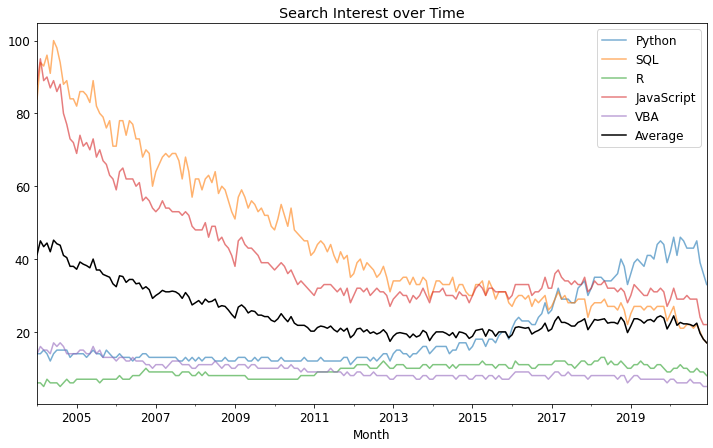

In [20]:
ax = trends_cleaned.plot(figsize=(12,7), 
                         alpha=0.6, 
                         title='Search Interest over Time')

ax = trends_cleaned.mean(axis=1).plot(color='k', 
                                      linestyle='-', 
                                      label='Average')
plt.legend();

Smooth out the lines using rolling average or resample:

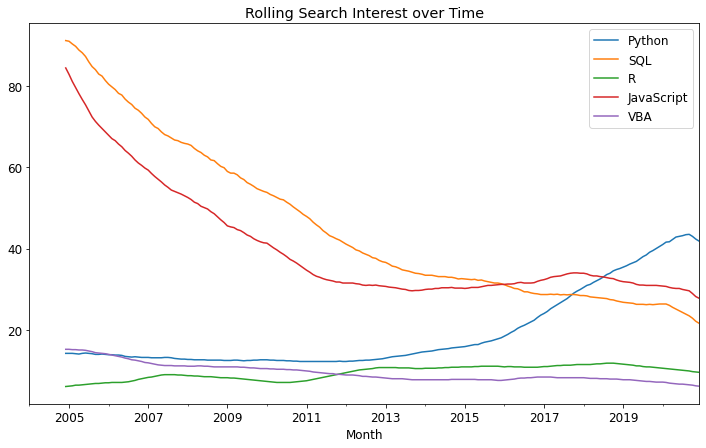

In [21]:
ax = (
    trends_cleaned
    .rolling(window=12)
    .mean()
    .plot(figsize=(12,7), title='Rolling Search Interest over Time')
)

Let's start looking at the percentage change in search interest over time...

Remember our pct_change_all data from earlier?

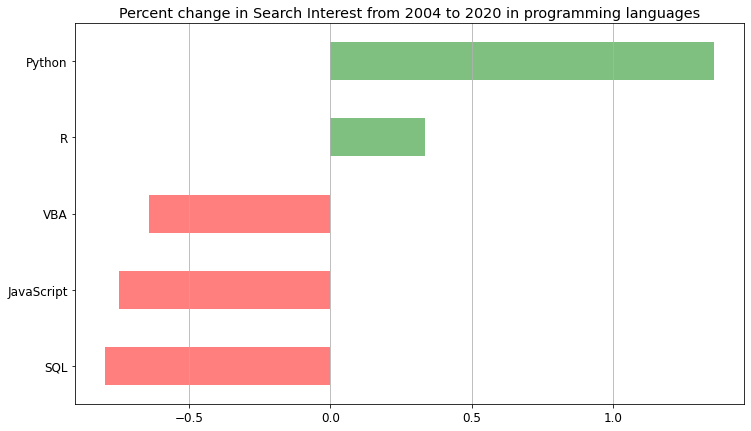

In [22]:
# plot the data on the axes: ax
sorted_pct = pct_change_all.sort_values()
ax = (
    sorted_pct
    .plot(kind='barh',
          figsize=(12,7), 
          color=(sorted_pct>= 0).map({True: 'g', False: 'r'}), 
          alpha=0.5)
)
# add grid to graph for readability
ax.xaxis.grid()

# add title
plt.title('Percent change in Search Interest from 2004 to 2020 in programming languages');

We can use the method `.pct_change()` to look at the percentage change from *n* observations ago. Since every observation is a month let's use the parameter `periods=12` to look at the change each month from the year before.

Let's look at the *Annual Percent Change of Python Search Interest for Each Month*.

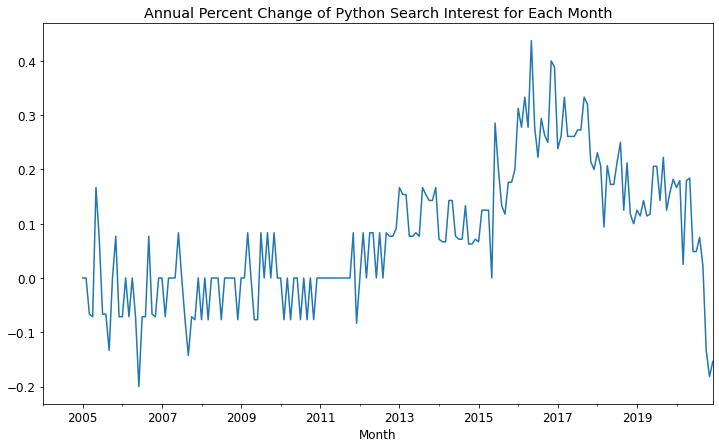

In [23]:
ax = (
    trends_cleaned
    .pct_change(12)
    ['Python']
    .plot(figsize=(12,7), 
          title='Annual Percent Change of Python Search Interest for Each Month')
)

That's a bit hard to read, and comparing with other languages will be very difficult on one plot. Let's use subplots (and a little bit of coloring magic) to compare.

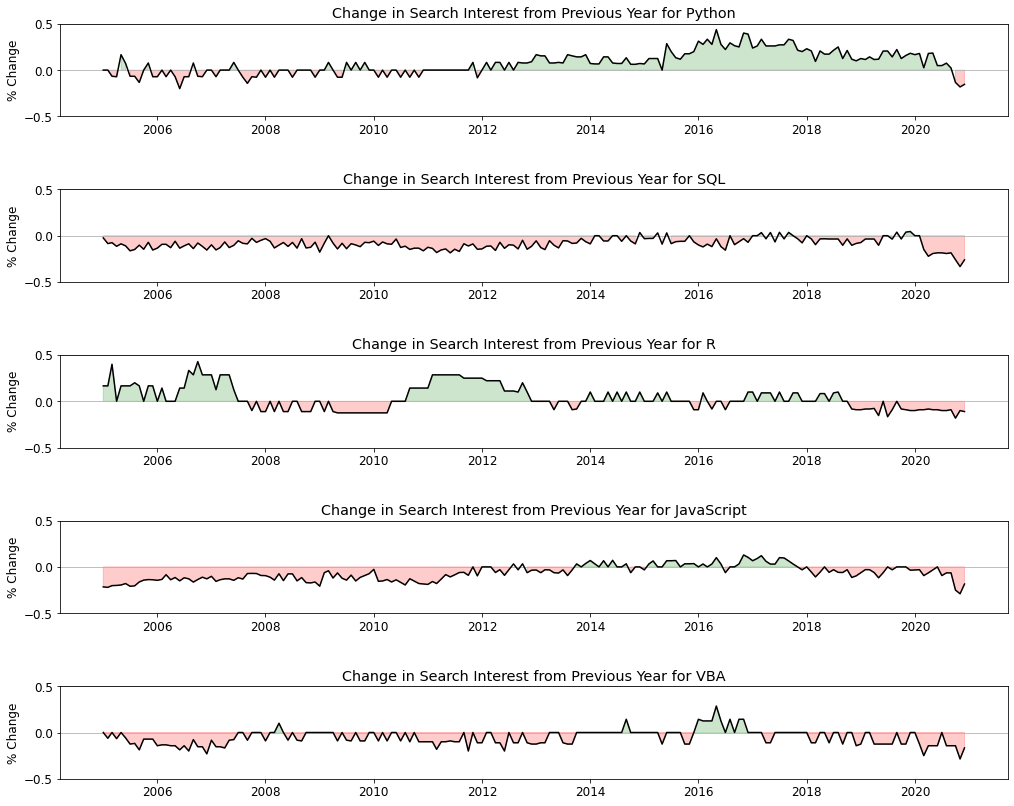

In [24]:
# look at the percentage increase in each month from 12 months ago (previous year)
trends_pct_change = trends_cleaned.pct_change(12)

# set up 5 vertical subplots
fig, axs = plt.subplots(5, figsize=(15,12))

# loop over each subplot & each column
for ax, col in zip(axs, trends_pct_change.columns):
    # plot the percentage change for each language
    ax.plot(trends_pct_change.index, trends_pct_change[col],  color='k') 
    
    # fill the space between the line and zero with GREEN if positive and RED if negative.
    ax.fill_between(trends_pct_change.index, trends_pct_change[col], where=trends_pct_change[col]<=0, color='r', alpha=0.2)
    ax.fill_between(trends_pct_change.index, trends_pct_change[col], where=trends_pct_change[col]>=0, color='g', alpha=0.2)
    
    # set y-axis and title
    ax.set_ylim([-0.5,0.5])
    ax.yaxis.grid()
    ax.set_ylabel('% Change')
    ax.set_title(f"Change in Search Interest from Previous Year for {col}")
    
plt.tight_layout(pad=3.0)

Let's have a look at the average percent change year on year:

In [25]:
yearly_trends = (
    trends_cleaned
    .groupby(trends_cleaned.index.year)
    .mean()
    .pct_change()
)

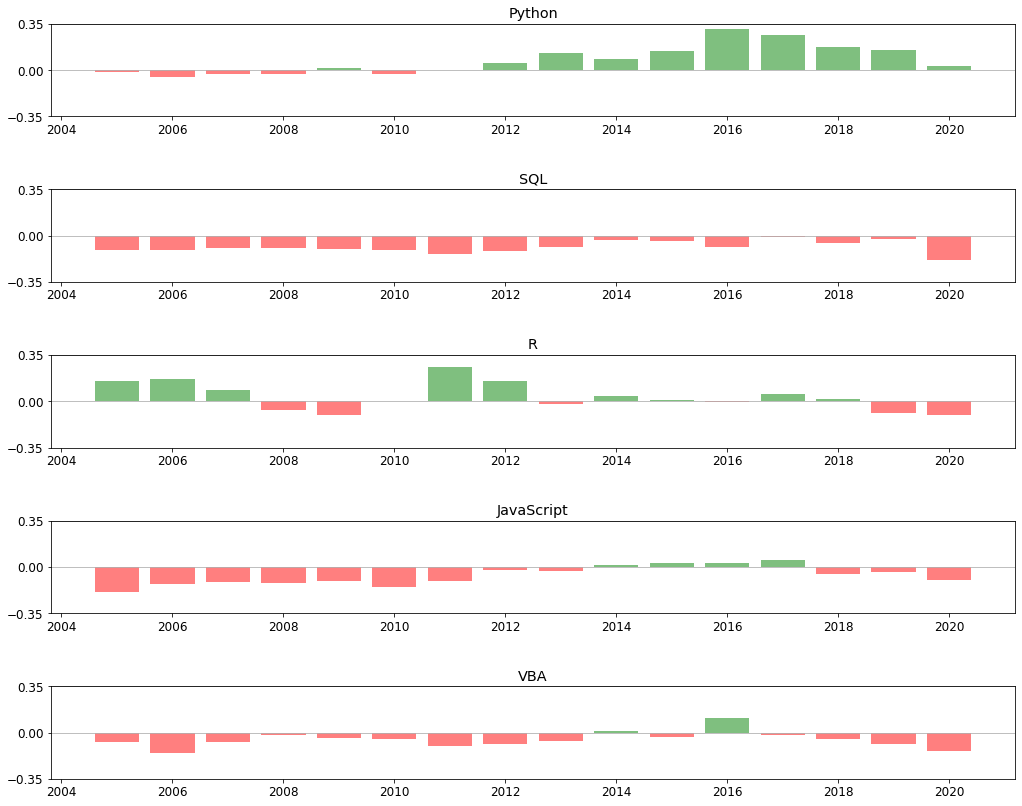

In [26]:
import numpy as np

# set up 5 vertical sublots
fig, axs = plt.subplots(5, figsize=(15,12))

# loop through each column to plot on each subplot
for ax, col in zip(axs, yearly_trends.columns):

    # bar plot using color map for pos/neg values
    ax.bar(
           yearly_trends.index, 
           yearly_trends[col], 
           color=(yearly_trends[col] >= 0).map({True: 'g', False: 'r'}), alpha=0.5
          )
    
    # set labels
    ax.set_title(f"{col}")
    ax.yaxis.grid(which='major')
    ax.set_ylim([-0.35, 0.35])
    major_ticks = np.arange(-0.35,0.36,0.35)
    ax.set_yticks(major_ticks)
    
plt.tight_layout(pad=3.0)

<img src='../images/panda.gif' width='300px' align='right' style="padding: 20px">

## Final thoughts...

Learning Pandas can be quite frustrating but with practice (and Google!) it becomes straightforward and extremely powerful.

**Want to learn more? Join us on a public course:**
- [Python for Data Analysts](https://godatadriven.com/training/python-for-data-analysts-training/)
- [Certified Python for Data Science](https://godatadriven.com/training/data-science-python-foundation-training/)
- [And more!](https://godatadriven.com/what-we-do/train/#upcoming)

Interested in our other courses? Download our [Training Guide](https://godatadriven.com/topic/training-brochure/)